In [ ]:
#!pip install histocartography

In [26]:
import dgl
import numpy as np
import pandas as pd
import torch
import copy
import pickle
import cgm_model
import utils
import importlib
importlib.reload(cgm_model)
importlib.reload(utils)
import cgm_model
import utils

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# DATA_PATH = '/content/drive/Shareddrives/BIOINF 593 Course Project/'
DATA_PATH = './data/'
pt_data = pd.read_excel(DATA_PATH+'CRC_TMAs_patient_annotations.xlsx')
cell_data = pd.read_csv(DATA_PATH+'CRC_master.csv')

/home/joeleliason/anaconda3/envs/hactnet/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
gnn_params = {'readout_op': 'concat',
 'layer_type': 'gin_layer',
 'agg_type': 'mean',
 'output_dim': 16,
 'num_layers': 2,
 'readout_type': 'mean',
 'batch_norm': True,
 'act': 'relu'}
classification_params = {'hidden_dim': 16, 'num_layers': 2}

In [7]:
data, labs, ids = cgm_model.data_to_dgl_graph(pt_data, cell_data, mode='connectivity', normalize=True)

/home/joeleliason/Dropbox (University of Michigan)/Projects/bioinf593/bioinf593_final_project/cgm_model.py:32: RuntimeWarning: invalid value encountered in true_divide
  features = np.nan_to_num((features-features.mean(axis=0))/features.std(axis=0))
/home/joeleliason/Dropbox (University of Michigan)/Projects/bioinf593/bioinf593_final_project/cgm_model.py:32: RuntimeWarning: invalid value encountered in true_divide
  features = np.nan_to_num((features-features.mean(axis=0))/features.std(axis=0))
/home/joeleliason/Dropbox (University of Michigan)/Projects/bioinf593/bioinf593_final_project/cgm_model.py:32: RuntimeWarning: invalid value encountered in true_divide
  features = np.nan_to_num((features-features.mean(axis=0))/features.std(axis=0))
/home/joeleliason/Dropbox (University of Michigan)/Projects/bioinf593/bioinf593_final_project/cgm_model.py:32: RuntimeWarning: invalid value encountered in true_divide
  features = np.nan_to_num((features-features.mean(axis=0))/features.std(axis=0))


In [ ]:
num_models = 10
cgm_reps = []
for _ in range(num_models):
    model = cgm_model.CGModel(gnn_params=gnn_params, classification_params=classification_params, node_dim=74, num_epochs=50)
    model.train(data)
    cgm_reps.append(copy.deepcopy(model))

In [25]:
with open(DATA_PATH+'cgm_reps_group.pkl','rb') as f:
    cgm_reps = pickle.load(f)

In [27]:
res = cgm_model.get_model_score_dict(cgm_reps, data, labs)

In [28]:
len(res)

140

In [29]:
with open(DATA_PATH+"importance_scores_group_prediction.pkl", 'wb') as f:
    pickle.dump(res, f)

In [30]:
scl = res[0]

In [32]:
scl

,cell_type,X,Y,cell_id,spot_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad
0,granulocytes,77.0,589.0,0,0,0.016950,0.350585,0.000000,0.116528,0.140501,0.017379,0.099837,0.129521,0.024781,0.007914,0.062309,0.076995
1,granulocytes,106.0,826.0,1,0,0.014687,0.075043,0.240120,0.269666,0.001379,0.047645,0.000000,0.006499,0.023416,0.148588,0.035531,0.082052
2,granulocytes,107.0,545.0,2,0,0.068091,0.000000,0.000000,0.030736,0.028675,0.017152,0.000000,0.099696,0.010412,0.000000,0.013782,0.025059
3,granulocytes,98.0,564.0,3,0,0.007142,0.281647,0.000000,0.060714,0.322154,0.054891,0.217566,0.138132,0.020155,0.000000,0.057803,0.103708
4,granulocytes,217.0,329.0,4,0,0.252162,0.901895,0.414942,0.469559,0.380645,0.344093,0.475564,0.249722,0.201604,0.044381,0.362369,0.155064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,undefined,1686.0,503.0,240084,0,0.110061,0.000000,0.020442,0.093610,0.008543,0.000000,0.257543,0.010750,0.000000,0.080056,0.015596,0.061774
1160,undefined,1868.0,553.0,240085,0,0.073889,0.000000,0.000000,0.104903,0.000000,0.042700,0.000000,0.002508,0.000000,0.061639,0.001254,0.033775
1161,tumor cells / immune cells,1310.0,135.0,246598,0,0.038855,0.000000,0.037085,0.113898,0.026791,0.000000,0.022953,0.051900,0.000000,0.000715,0.024872,0.024972
1162,immune cells / vasculature,1634.0,1242.0,248395,0,0.000000,0.000000,0.000000,0.081498,0.063708,0.007302,0.000000,0.001153,0.000000,0.070375,0.000576,0.029674


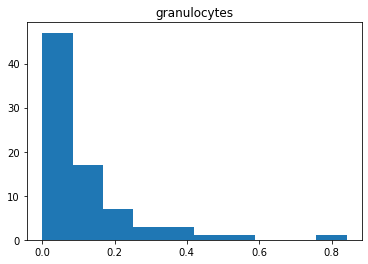

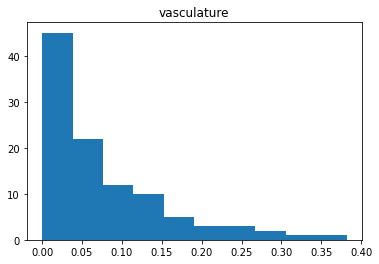

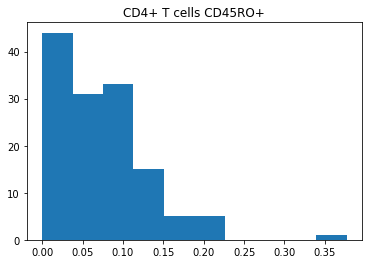

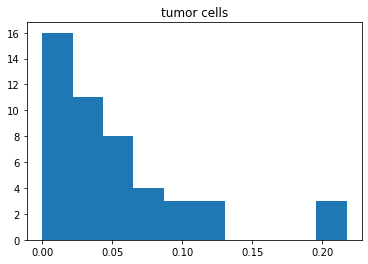

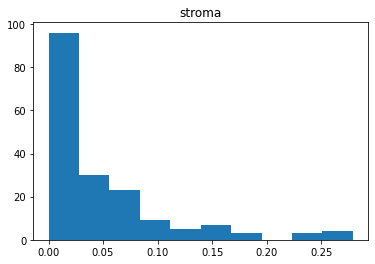

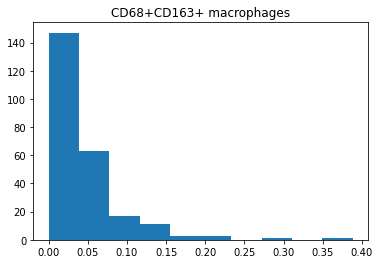

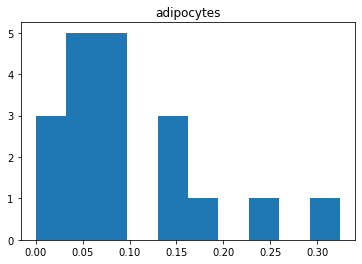

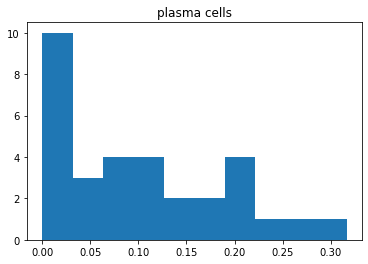

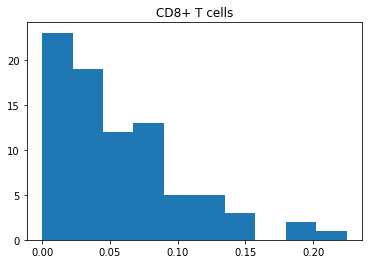

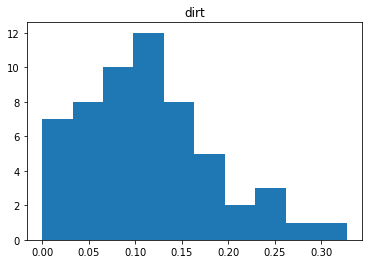

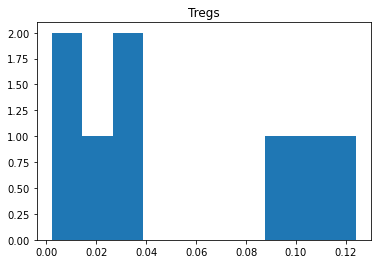

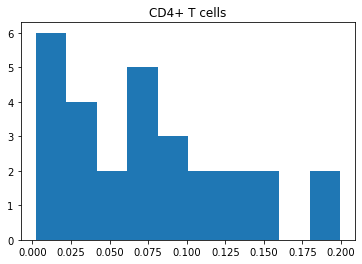

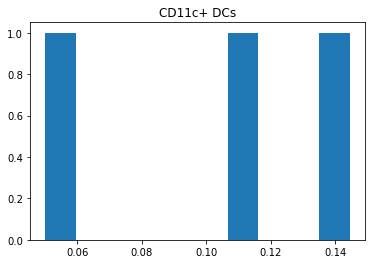

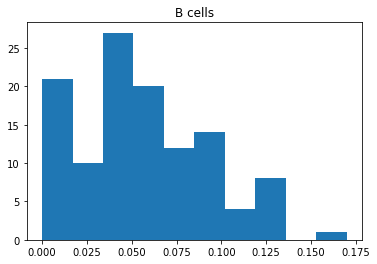

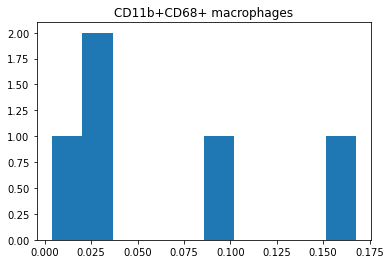

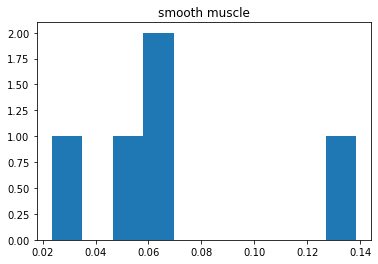

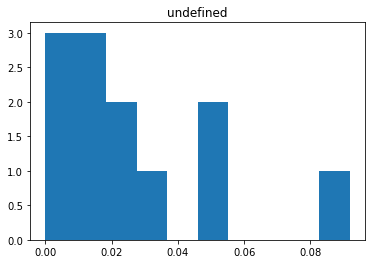

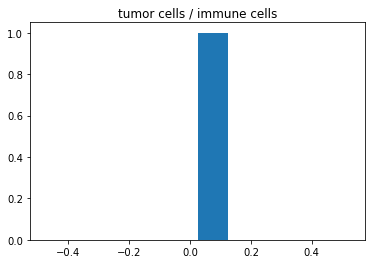

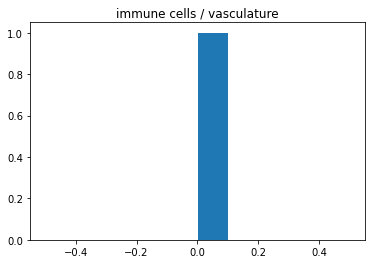

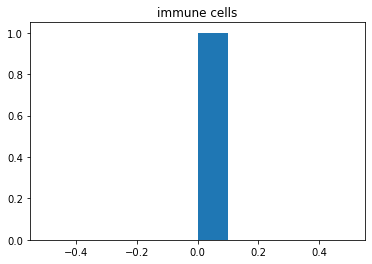

In [31]:
import matplotlib.pyplot as plt
for ct in scl.cell_type.unique():
    plt.hist(scl[scl['cell_type'] == ct].campp_median)
    plt.title(ct)
    plt.show()